# ANGULAR SIZE VERSUS Z

In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [1]:
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
# matplotlib.use('TkAgg')  # Use the TkAgg backend (or another appropriate one)
import numpy as np
import math
import pandas as pd
from hugalaxy import GalaxyWrapper, plotRotationCurve, move_rotation_curve, calculate_density_parameters
from timeit import default_timer as timer
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
from IPython.display import HTML


def density_parameters(Z):
    df = np.zeros([len(Z), 5])
    for i, z in enumerate(Z):
        df[i,:]=calculate_density_parameters(z)
    return df



In [ ]:
# Create a figure and a 3D Axes
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
# matplotlib.use('TkAgg')  # Use the TkAgg backend (or another appropriate one)
import numpy as np
import math
import pandas as pd
from hugalaxy import GalaxyWrapper, plotRotationCurve, move_rotation_curve, calculate_density_parameters
from timeit import default_timer as timer
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec
from IPython.display import HTML


R_0 = 14.01  # 4D radius of the Universe
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
r = np.linspace(0,10000,100)
phi = np.linspace(0, 2*np.pi,360)
R, Phi = np.meshgrid(r, phi)
X = R * np.cos(Phi)
Y = R * np.sin(Phi)
ax = plt.subplot(gs[0], projection='3d')
ax2 = plt.subplot(gs[1], projection='polar')  # 1 row, 2 columns, second subplot

ax2.set_rmax(R_0)
ax2.set_rticks([])  # Less radial ticks
ax2.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax2.grid(True)
ax2.set_title("$M_{33}$ Ancient Photon's path across \nthe Hyperspherical Universe", va='bottom')

ax.set_xlabel('X (Lyr)')
ax.set_ylabel('Y (Lyr)')
ax.set_zlabel('Density (atm/$cm^3$)')
    
def animate(i):
    ax.cla()  # Clear the current 3D subplot
    ax2.cla()  # Clear the current polar subplot
    # Create the 3D subplot

    Density_Parameters = calculate_density_parameters(i)
    Rho = Density_Parameters[0] * np.exp(-Density_Parameters[1]*R)
    # Move z axis label
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('Density', rotation=90, va='bottom')
    # Draw the initial frame.
    ax.plot_surface(X, Y, Rho, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0)

    ax.set_title('Redshift z = %.2f' % i)

    

    z_0 = i  # the initial redshift
    # Create the second subplot


    #... Your plotting code ...
    

    # Create the second subplot
    circle_outer = plt.Circle((0, 0), R_0, transform=ax2.transData._b, fill = False)
    circle_inner = plt.Circle((0, 0), R_0/(1+i), transform=ax2.transData._b, fill = False, linestyle='dashed')


    ax2.add_artist(circle_outer)
    ax2.add_artist(circle_inner)

    ax2.plot(np.pi/2, R_0, 'go')
    ax2.text(np.pi/2, R_0, 'Earth', horizontalalignment='right')
    ax2.text(np.pi/2, R_0*1.4, 'Optical Path \nof Ancient Photons', horizontalalignment='left')

    z_values = np.linspace(0, i, 100)
    R_values = R_0/(1+z_values)
    angle_values =  np.pi/2 - R_values/R_0
        
    
    R_z0 =  R_0/(1+i)
#     print("R_z0: ", R_z0)  # add this line to check the value of R_z0

    angle_0 =  np.pi/2 - 1 + 1/(1+i)
#     print("angle_0: ", angle_0)  # add this line to check the value of angle_0


    ax2.plot(angle_0, R_z0, 'ro')
    ax2.text(angle_0*0.92, R_z0, '$M_{33}$', horizontalalignment='left')
    ax2.scatter( angle_0 + (R_values-R_z0)/R_0, R_values, color='b', s=0.5)

    ax2.set_rmax(R_0)
    ax2.set_rticks([])  # Less radial ticks
    ax2.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    ax2.grid(True)

    plt.subplots_adjust(wspace=0.3)


# Call FuncAnimatio
ani = FuncAnimation(fig, animate, frames=[*np.linspace(0, 3, 20),*np.linspace(3.1, 13, 10)], interval=1000)

# Display the animation
display(HTML(ani.to_html5_video()))
ani.save("M33Evolution.mp4")

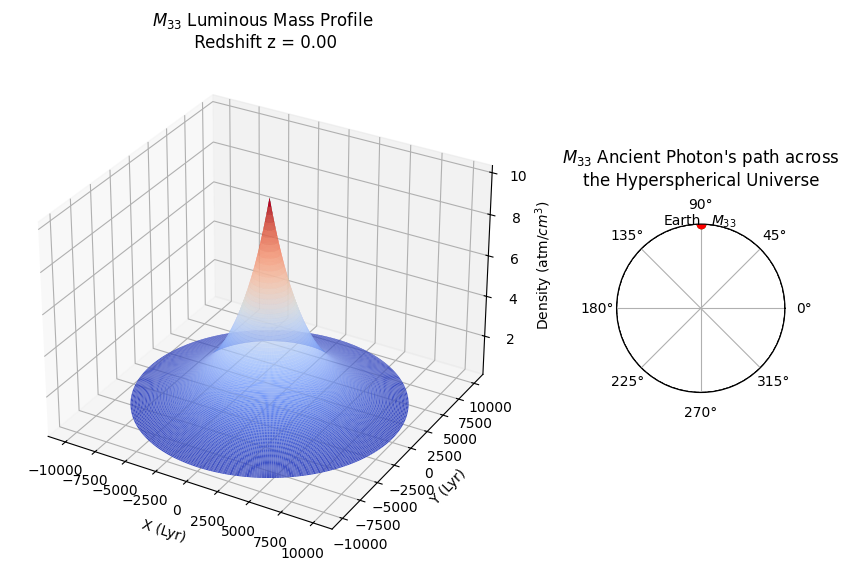

FloatSlider(value=0.0, continuous_update=False, description='Redshift:', max=13.0)

Output()

In [8]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.gridspec as gridspec
from IPython.display import HTML

def plot_3d_density(z):
    # Create a figure and a 3D Axes
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    r = np.linspace(0,10000,100)
    phi = np.linspace(0, 2*np.pi,360)
    R, Phi = np.meshgrid(r, phi)
    X = R * np.cos(Phi)
    Y = R * np.sin(Phi)
    # Create the 3D subplot
    ax = plt.subplot(gs[0], projection='3d')

    # Move z axis label
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('Density', rotation=90, va='bottom')

    Density_Parameters = calculate_density_parameters(z)
    Rho = Density_Parameters[0] * np.exp(-Density_Parameters[1]*R)

    # Draw the initial frame.
    ax.plot_surface(X, Y, Rho, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0)

    ax.set_title("$M_{33}$ Luminous Mass Profile\n Redshift z = %.2f" % z)
    ax.set_xlabel('X (Lyr)')
    ax.set_ylabel('Y (Lyr)')
    ax.set_zlabel('Density (atm/$cm^3$)')



    R_0 = 14.01  # 4D radius of the Universe
    z_0 = z  # the initial redshift

    # Create the second subplot
    ax = plt.subplot(gs[1], projection='polar')  # 1 row, 2 columns, second subplot

    circle_outer = plt.Circle((0, 0), R_0, transform=ax.transData._b, fill = False)
    circle_inner = plt.Circle((0, 0), R_0/(1+z_0), transform=ax.transData._b, fill = False, linestyle='dashed')

    ax.add_artist(circle_outer)
    ax.add_artist(circle_inner)

    ax.plot(np.pi/2, R_0, 'go')

    z_values = np.linspace(0, z_0, 100)
    R_values = R_0/(1+z_values)
    R_z0 =  R_0/(1+z_0)
    angle_0 = 1 - 1/(1+z_0)
    angle_values =  R_values/R_0

    ax.plot(np.pi/2-angle_0, R_z0, 'ro')
    ax.text(np.pi/2, R_0, 'Earth', horizontalalignment='right')
    ax.text((np.pi/2-angle_0)*0.92, R_z0, '$M_{33}$', horizontalalignment='left')
    ax.scatter(np.pi/2 - angle_0 + (R_values-R_z0)/R_0, R_values, color='b', s=0.5)

    ax.set_rmax(R_0)
    ax.set_rticks([])  # Less radial ticks
    ax.set_rlabel_position(-24.5)  # Move radial labels away from plotted line
    ax.grid(True)

    ax.set_title("$M_{33}$ Ancient Photon's path across \nthe Hyperspherical Universe", va='bottom')
    plt.subplots_adjust(wspace=0.3)
#     plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
    plt.show()


z_slider = widgets.FloatSlider(min=0, max=13, step=0.1, value=0, description='Redshift:', continuous_update=False)
interactive_plot = widgets.interactive_output(plot_3d_density, {'z': z_slider})
display(z_slider, interactive_plot)


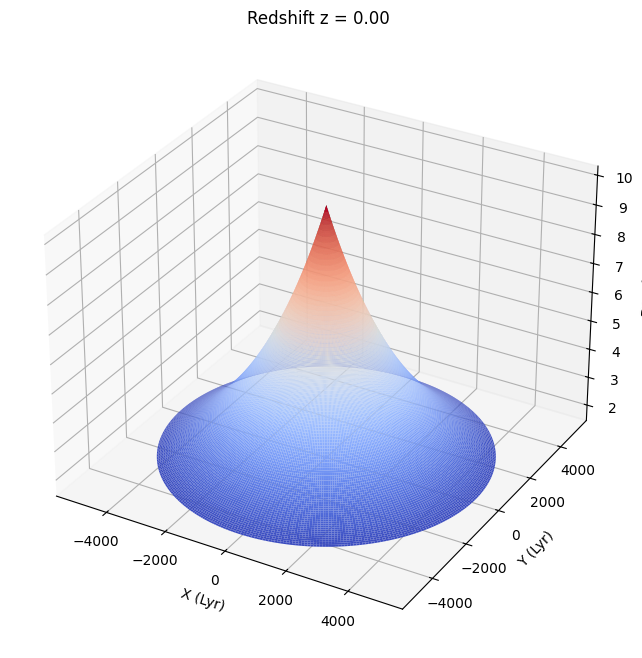

In [9]:
# convert to Cartesian coordinates
r = np.linspace(0,5000,100)
phi = np.linspace(0, 2*np.pi,360)
R, Phi = np.meshgrid(r, phi)
X = R * np.cos(Phi)
Y = R * np.sin(Phi)
# define the redshift range
z = [*np.arange(0, 2, 0.1), *np.arange(2.1, 21, 1)]
# Create a figure and a 3D Axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

Density_Parameters = calculate_density_parameters(z[0])
Rho = Density_Parameters[0] * np.exp(-Density_Parameters[1]*R)

# Draw the initial frame.
# rstride and cstride control the stride (step size) used to create the surface
surface = ax.plot_surface(X, Y, Rho, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0)

ax.set_title('Redshift z = %.2f' % z[0])
ax.set_xlabel('X (Lyr)')
ax.set_ylabel('Y (Lyr)')
ax.set_zlabel('Density Rho')

# This is a function that updates the plot for each frame, i
def animate(i):
#     ax.cla() # clear the plot
    ax.collections[-1].remove()
    Density_Parameters = calculate_density_parameters(z[i])
    Rho = Density_Parameters[0] * np.exp(-Density_Parameters[1]*R)
    ax.plot_surface(X, Y, Rho, cmap=cm.coolwarm, rstride=1, cstride=1, linewidth=0)
    ax.set_title('Redshift z = %.2f' % z[i])
    ax.set_xlabel('X (Lyr)')
    ax.set_ylabel('Y (Lyr)')
    ax.set_zlabel('Density')


ani = animation.FuncAnimation(fig, animate, frames=len(z), repeat=True, interval=100)

# Display the animation
display(HTML(ani.to_html5_video()))
# Save the animation
ani.save("3D_density.mp4")